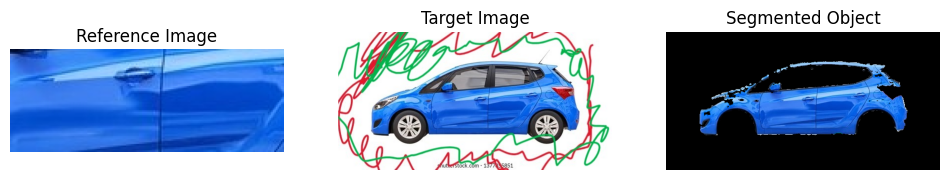

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt



roi = cv.imread('../data/bluecarcrop.jpg')

# cv.imshow('roi', roi)
# cv.waitKey(0)
# cv.destroyAllWindows()

roi_hsv = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

roi_hist = cv.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

roi_hist = cv.normalize(roi_hist, roi_hist, 0, 180, cv.NORM_MINMAX)

target_image = cv.imread('../data/bluecar.jpg')
target_hsv = cv.cvtColor(target_image, cv.COLOR_BGR2HSV)

back_projection = cv.calcBackProject([target_hsv], [0, 1], roi_hist, [0, 180, 0, 256], 1)

cv.imshow('back_projection', back_projection)
cv.waitKey(0)
cv.destroyAllWindows()

disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
back_projection = cv.filter2D(back_projection, -1, disc)

cv.imshow('back_projection', back_projection)
cv.waitKey(0)
cv.destroyAllWindows()

_, thresh = cv.threshold(back_projection, 10, 255, cv.THRESH_BINARY)

thresh = cv.merge((thresh, thresh, thresh))

result = cv.bitwise_and(target_image, thresh)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
plt.title('Reference Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(target_image, cv.COLOR_BGR2RGB))
plt.title('Target Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Segmented Object')
plt.axis('off')

plt.show()

cv.imshow('target_image', target_image)
cv.imshow('result', result)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
# import cv
# disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
# disc